# **Basic financial data analysis**

### **For better graph visualization (iplots) use external view (nbviewer.jupyter.org).**

###### **Imports**

In [1]:
from pandas_datareader import data, wb
import pandas as pd
import numpy as np
import datetime
%matplotlib inline

###### **Data**

In [2]:
# Bank of America
BAC = pd.read_csv('BAC.csv')

# CitiGroup
C = pd.read_csv('C.csv')

# Goldman Sachs
GS = pd.read_csv('GS.csv')

# JPMorgan Chase
JPM = pd.read_csv('JPM.csv')

# Morgan Stanley
MS = pd.read_csv('MS.csv')

# Wells Fargo
WFC = pd.read_csv('WFC.csv')


In [3]:
tickers = ['BAC', 'C', 'GS', 'JPM', 'MS', 'WFC']

In [4]:
bank_stocks=pd.concat([BAC,C,GS,JPM,MS,WFC],axis=1,keys=tickers)
bank_stocks=bank_stocks.set_index([bank_stocks['BAC']['Date']])
bank_stocks.head()

BAC                                                 C  \
                  Date   Open   High    Low  Close    Volume        Date   
Date                                                                       
2006-01-03  2006-01-03  46.92  47.18  46.15  47.08  16296700  2006-01-03   
2006-01-04  2006-01-04  47.00  47.24  46.45  46.58  17757900  2006-01-04   
2006-01-05  2006-01-05  46.58  46.83  46.32  46.64  14970900  2006-01-05   
2006-01-06  2006-01-06  46.80  46.91  46.35  46.57  12599800  2006-01-06   
2006-01-09  2006-01-09  46.72  46.97  46.36  46.60  15620000  2006-01-09   

                                   ...        MS                         \
             Open   High    Low    ...      High    Low  Close   Volume   
Date                               ...                                    
2006-01-03  490.0  493.8  481.1    ...     58.49  56.74  58.31  5377000   
2006-01-04  488.6  491.0  483.5    ...     59.28  58.35  58.35  7977800   
2006-01-05  484.4  487.8  484.0    ...     58.59  58.02  58.51  5778000   
2006-01-06  488.8  489.0  482.0    ...     58.85  58.05  58.57  6889800   
2006-01-09  486.0  487.4  483.0    ...     59.29  58.62  59.19  4144500   

                   WFC                                        
                  Date   Open   High    Low  Close    Volume  
Date                                                          
2006-01-03  2006-01-03  31.60  31.98  31.20  31.90  11016400  
2006-01-04  2006-01-04  31.80  31.82  31.36  31.53  10871000  
2006-01-05  2006-01-05  31.50  31.56  31.31  31.50  10158000  
2006-01-06  2006-01-06  31.58  31.78  31.38  31.68   8403800  
2006-01-09  2006-01-09  31.68  31.82  31.56  31.68   5619600  

[5 rows x 36 columns]

In [5]:
df = bank_stocks

In [6]:
bank_stocks.columns.names = ['Bank Ticker','Stock Info']
bank_stocks.head()

Bank Ticker         BAC                                                 C  \
Stock Info         Date   Open   High    Low  Close    Volume        Date   
Date                                                                        
2006-01-03   2006-01-03  46.92  47.18  46.15  47.08  16296700  2006-01-03   
2006-01-04   2006-01-04  47.00  47.24  46.45  46.58  17757900  2006-01-04   
2006-01-05   2006-01-05  46.58  46.83  46.32  46.64  14970900  2006-01-05   
2006-01-06   2006-01-06  46.80  46.91  46.35  46.57  12599800  2006-01-06   
2006-01-09   2006-01-09  46.72  46.97  46.36  46.60  15620000  2006-01-09   

Bank Ticker                         ...        MS                         \
Stock Info    Open   High    Low    ...      High    Low  Close   Volume   
Date                                ...                                    
2006-01-03   490.0  493.8  481.1    ...     58.49  56.74  58.31  5377000   
2006-01-04   488.6  491.0  483.5    ...     59.28  58.35  58.35  7977800   
2006-01-05   484.4  487.8  484.0    ...     58.59  58.02  58.51  5778000   
2006-01-06   488.8  489.0  482.0    ...     58.85  58.05  58.57  6889800   
2006-01-09   486.0  487.4  483.0    ...     59.29  58.62  59.19  4144500   

Bank Ticker         WFC                                        
Stock Info         Date   Open   High    Low  Close    Volume  
Date                                                           
2006-01-03   2006-01-03  31.60  31.98  31.20  31.90  11016400  
2006-01-04   2006-01-04  31.80  31.82  31.36  31.53  10871000  
2006-01-05   2006-01-05  31.50  31.56  31.31  31.50  10158000  
2006-01-06   2006-01-06  31.58  31.78  31.38  31.68   8403800  
2006-01-09   2006-01-09  31.68  31.82  31.56  31.68   5619600  

[5 rows x 36 columns]

In [7]:
df.xs('Close',axis=1,level=1).max()

Bank Ticker
BAC     54.90
C      564.10
GS     247.92
JPM     70.08
MS      89.30
WFC     58.52
dtype: float64

In [8]:
returns = pd.DataFrame()

In [9]:
for Bank in tickers:
    returns[Bank+' Return'] = df[Bank]['Close'].pct_change()
returns.head()

BAC Return  C Return  GS Return  JPM Return  MS Return  WFC Return
Date                                                                          
2006-01-03         NaN       NaN        NaN         NaN        NaN         NaN
2006-01-04   -0.010620 -0.018462  -0.013812   -0.014183   0.000686   -0.011599
2006-01-05    0.001288  0.004961  -0.000393    0.003029   0.002742   -0.000951
2006-01-06   -0.001501  0.000000   0.014169    0.007046   0.001025    0.005714
2006-01-09    0.000644 -0.004731   0.012030    0.016242   0.010586    0.000000

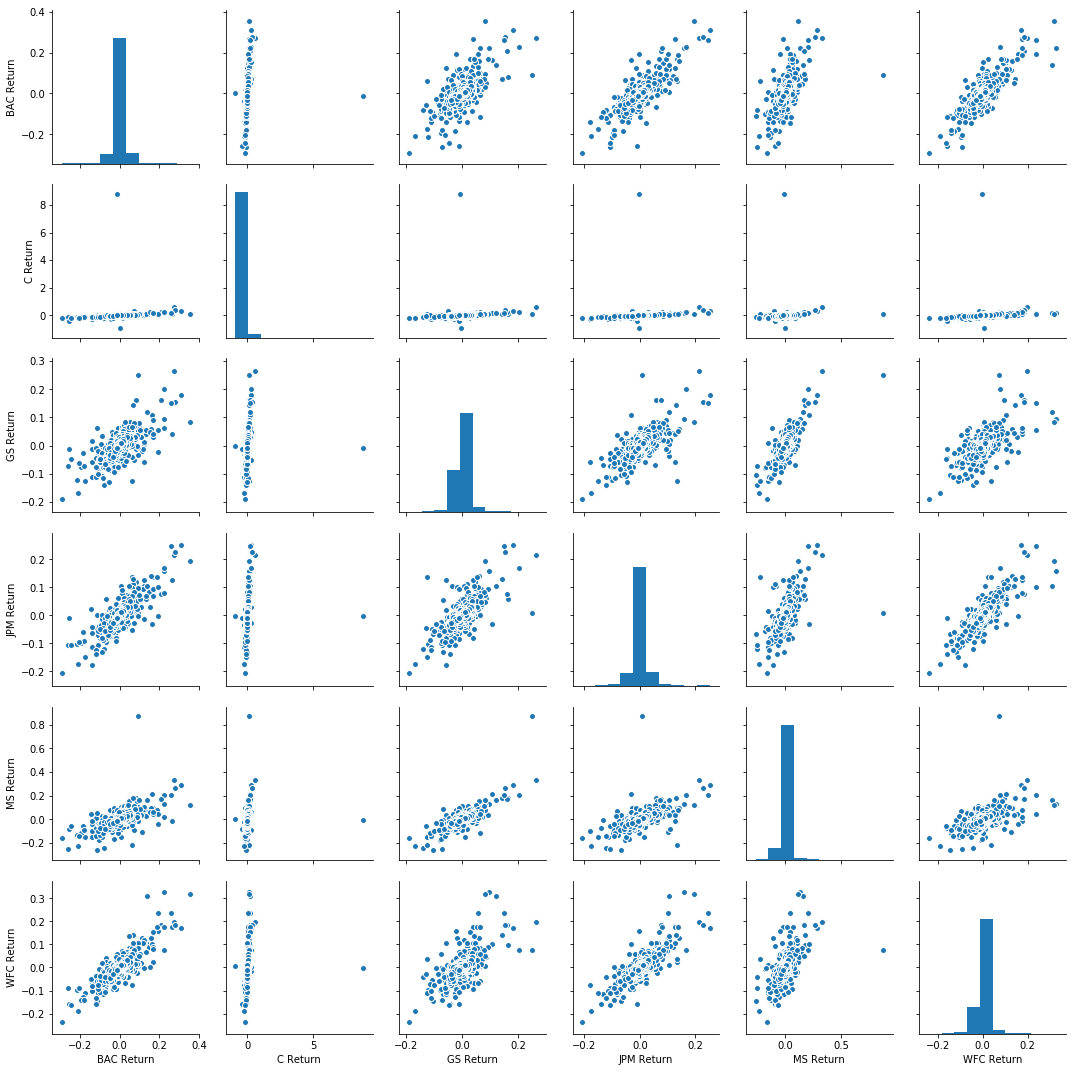

In [10]:
import seaborn as sns
sns.pairplot(returns[1:])

#### **Minimum return days for each banks**

In [11]:
returns.idxmin()

BAC Return    2009-01-20
C Return      2011-05-06
GS Return     2009-01-20
JPM Return    2009-01-20
MS Return     2008-10-09
WFC Return    2009-01-20
dtype: object

#### **Maximum return days for each banks**

In [12]:
returns.idxmax()

BAC Return    2009-04-09
C Return      2011-05-09
GS Return     2008-11-24
JPM Return    2009-01-21
MS Return     2008-10-13
WFC Return    2008-07-16
dtype: object

#### **Standard deviation for each banks**

In [13]:
returns.std()

BAC Return    0.036650
C Return      0.179969
GS Return     0.025346
JPM Return    0.027656
MS Return     0.037820
WFC Return    0.030233
dtype: float64

In [14]:
returns.loc['2015-01-01':'2015-12-31'].std()

BAC Return    0.016163
C Return      0.015289
GS Return     0.014046
JPM Return    0.014017
MS Return     0.016249
WFC Return    0.012591
dtype: float64

# Plotting Data

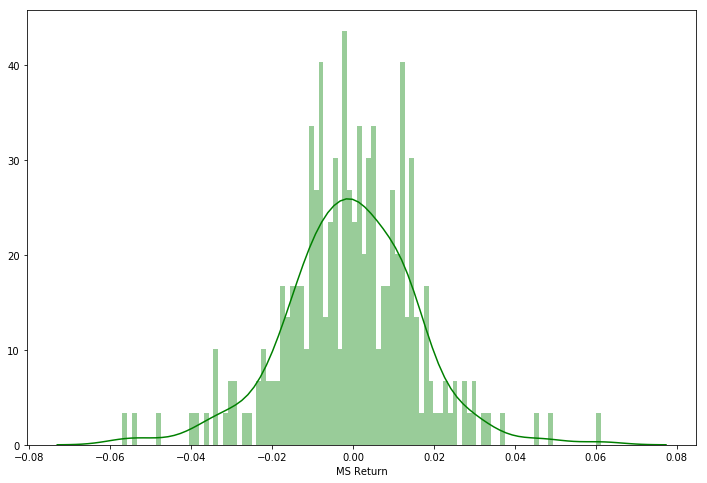

In [15]:
import matplotlib.pyplot as plt
plt.figure(figsize=(12,8))
sns.distplot(returns['MS Return'].loc['2015-01-01':'2015-12-31'],bins=100,color='green')

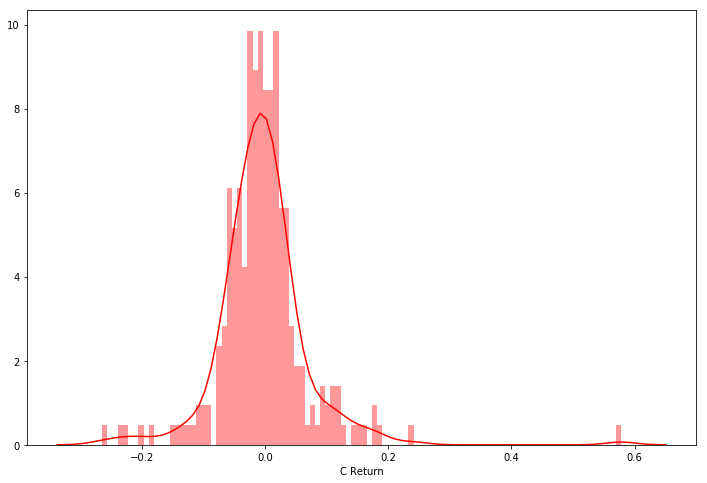

In [16]:
plt.figure(figsize=(12,8))
sns.distplot(returns['C Return'].loc['2008-01-01':'2008-12-31'],bins=100,color='red')

In [17]:
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style('whitegrid')
%matplotlib inline

#Plotly Method Imports
import plotly
import cufflinks as cf
cf.go_offline()

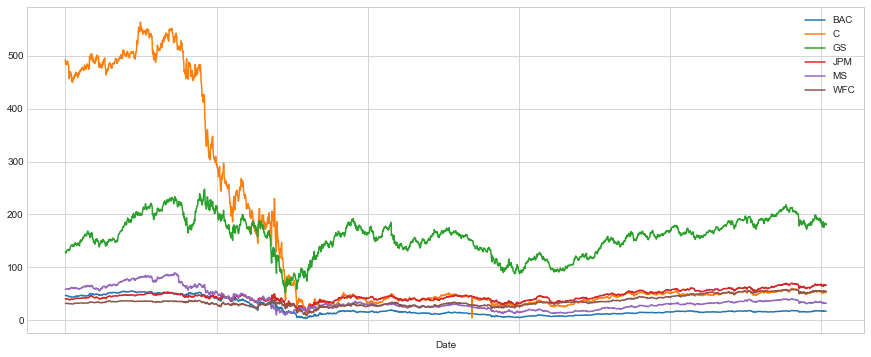

In [18]:
for bank in tickers:
        df[bank]['Close'].plot(figsize=(15,6),label=bank)
plt.legend()

**Another way of doing the same thing above is as:**

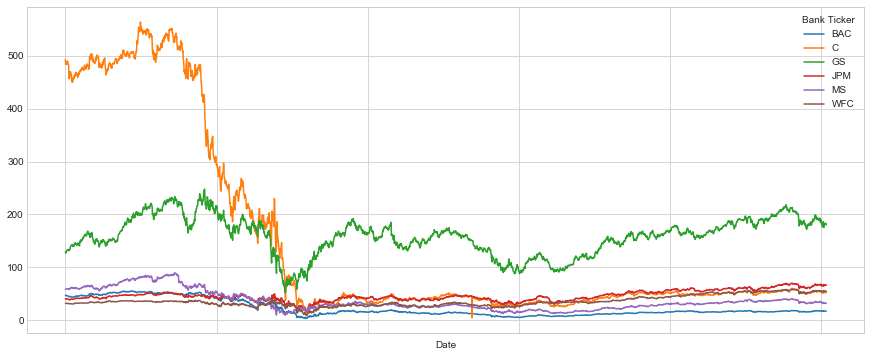

In [19]:
df.xs('Close',axis=1,level='Stock Info').plot(figsize=(15,6))

**Use external view to see iplots**

In [20]:
df.xs('Close',axis=1,level='Stock Info').iplot()

In [21]:
BAC.set_index('Date',inplace=True)

In [22]:
BAC['Roll']=BAC['Close'].loc['2008-01-01':'2008-12-31'].rolling(window=30).mean()
BAC.head()

Open   High    Low  Close    Volume  Roll
Date                                                  
2006-01-03  46.92  47.18  46.15  47.08  16296700   NaN
2006-01-04  47.00  47.24  46.45  46.58  17757900   NaN
2006-01-05  46.58  46.83  46.32  46.64  14970900   NaN
2006-01-06  46.80  46.91  46.35  46.57  12599800   NaN
2006-01-09  46.72  46.97  46.36  46.60  15620000   NaN

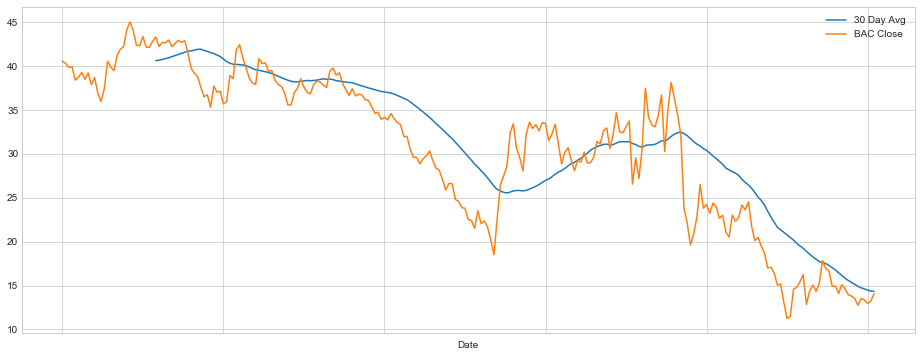

In [23]:
plt.figure(figsize=(16,6))
BAC['Close'].loc['2008-01-01':'2008-12-31'].rolling(window=30).mean().plot(label='30 Day Avg')
BAC['Close'].loc['2008-01-01':'2008-12-31'].plot(label='BAC Close')
plt.legend()

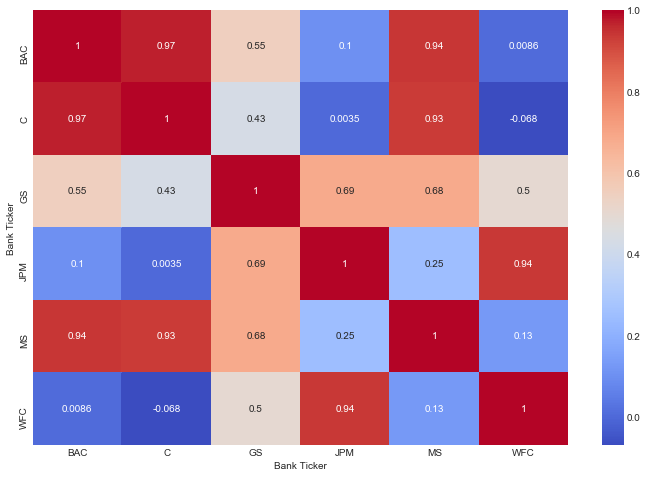

In [25]:
plt.figure(figsize=(12,8))
sns.heatmap(bank_stocks.xs('Close',level='Stock Info',axis=1).corr(),annot=True,cmap='coolwarm')

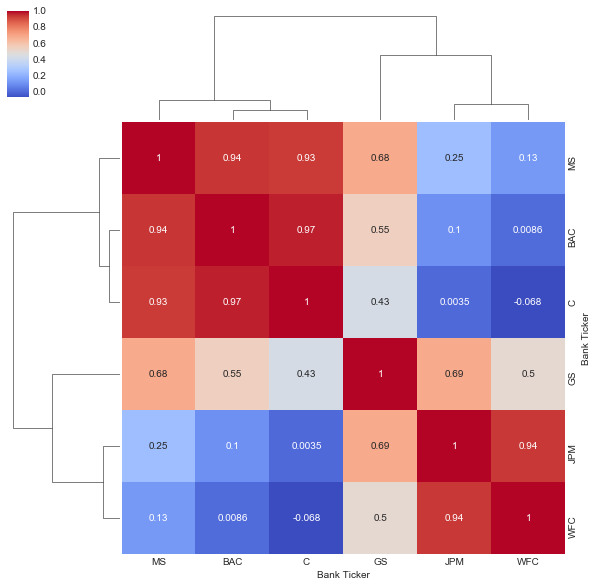

In [26]:
sns.clustermap(bank_stocks.xs('Close',level='Stock Info',axis=1).corr(),annot=True,cmap='coolwarm')

In [27]:
bank_stocks.xs('Close',level='Stock Info',axis=1).corr().iplot(kind='heatmap',colorscale='rdylbu')

In [28]:
BAC[['Open','Close','High','Low']].loc['2015-01-01':'2016-01-01'].iplot(kind='candle')

In [30]:
BAC['Close'].loc['2015-01-01':'2016-01-01'].ta_plot(study='boll')